In [23]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

In [24]:
_batch_size = 50
_lr = 0.001          #learning rate

In [25]:
_mnist = input_data.read_data_sets('./mnist', one_hot=True)
_x = _mnist.test.images[:2000]
_y = _mnist.test.labels[:2000]

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


In [26]:
print(_mnist.train.images.shape)
print(_mnist.train.labels.shape) 

(55000, 784)
(55000, 10)


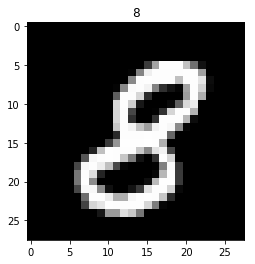

In [27]:
plt.imshow(_mnist.train.images[5].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(_mnist.train.labels[5])); 
plt.show()

In [28]:
_tf_x = tf.placeholder(tf.float32, [None, 28*28]) / 255.
_image = tf.reshape(_tf_x, [-1, 28, 28, 1])              # (batch, height, width, channel)
_tf_y = tf.placeholder(tf.int32, [None, 10])            # input y

In [29]:
# CNN
_conv1 = tf.layers.conv2d(   # shape (28, 28, 1)
    inputs=_image,
    filters=16,
    kernel_size=5,
    strides=1,
    padding='same',
    activation=tf.nn.relu
)           # -> (28, 28, 16)
_pool1 = tf.layers.max_pooling2d(
    _conv1,
    pool_size=2,
    strides=2,
)           # -> (14, 14, 16)

In [30]:
_conv2 = tf.layers.conv2d(_pool1, 32, 5, 1, 'same', activation=tf.nn.relu)    # -> (14, 14, 32)
_pool2 = tf.layers.max_pooling2d(_conv2, 2, 2)    # -> (7, 7, 32)

_flat = tf.reshape(_pool2, [-1, 7*7*32])          # -> (7*7*32, )
_output = tf.layers.dense(_flat, 10)              # output layer

In [31]:
_loss = tf.losses.softmax_cross_entropy(onehot_labels=_tf_y, logits=_output)           # compute cost
_train = tf.train.AdamOptimizer(_lr).minimize(_loss)

In [32]:
_accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.argmax(_tf_y, axis=1), predictions=tf.argmax(_output, axis=1),)[1]

In [33]:
sess = tf.Session()
_init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()) # the local var is for accuracy_op
sess.run(_init)     # initialize var in graph

In [34]:
print('start train........')
for step in range(600):
    b_x, b_y = _mnist.train.next_batch(_batch_size)
    _, loss_ = sess.run([_train, _loss], {_tf_x: b_x, _tf_y: b_y})
    if step % 100 == 0:
        accuracy_, flat_representation = sess.run([_accuracy, _flat], {_tf_x: _x, _tf_y: _y})
        print('Step:', step, '| train loss: %.4f' % loss_, '| test accuracy: %.2f' % accuracy_)

print('end train........')

start train........
Step: 0 | train loss: 2.2907 | test accuracy: 0.18
Step: 100 | train loss: 0.1583 | test accuracy: 0.54
Step: 200 | train loss: 0.2656 | test accuracy: 0.67
Step: 300 | train loss: 0.1472 | test accuracy: 0.73
Step: 400 | train loss: 0.1045 | test accuracy: 0.78
Step: 500 | train loss: 0.1520 | test accuracy: 0.81
end train........


In [35]:
# print 10 predictions from test data
_test_output = sess.run(_output, {_tf_x: _x[:10]})
_pred_y = np.argmax(_test_output, 1)
print(_pred_y, 'prediction number')
print(np.argmax(_y[:10], 1), 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


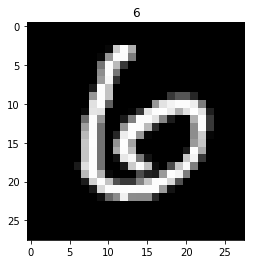

[6] prediction number
[6] real number


In [39]:
plt.imshow(_x[11].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(_y[11])); 
plt.show()

_test_output = sess.run(_output, {_tf_x: _x[11:12]})
_pred_y = np.argmax(_test_output, 1)
print(_pred_y, 'prediction number')
print(np.argmax(_y[11:12], 1), 'real number')